# Линейная регрессия

## Загрузка, предварительный и корреляционный анализ данных
Сперва загрузим исследуемый набор данных

In [122]:
import pandas as pd

data = pd.read_csv('lin-reg-data.csv')
display(data)

,feature_1,target
0,-4.018157,106.015920
1,64.706028,130.737664
2,-12.785478,103.773711
3,102.992207,132.287231
4,77.354378,133.729772
...,...,...
95,6.675497,123.119164
96,-12.707849,98.395122
97,125.758509,140.653990
98,103.160781,123.773896


В наборе присутствует 100 объектов, каждый из которых имеет один признак и одно значение целевой переменной. Перед нами задача регрессии, поскольку мы должны прогнозировать действительное число.

Переобозначим признак за $X$, а таргет за $y$.

In [123]:
X = data['feature_1'].values
y = data['target'].values

Поскольку мы имеем дело с данными в $\mathbb R^2$, то их можно визуализировать.

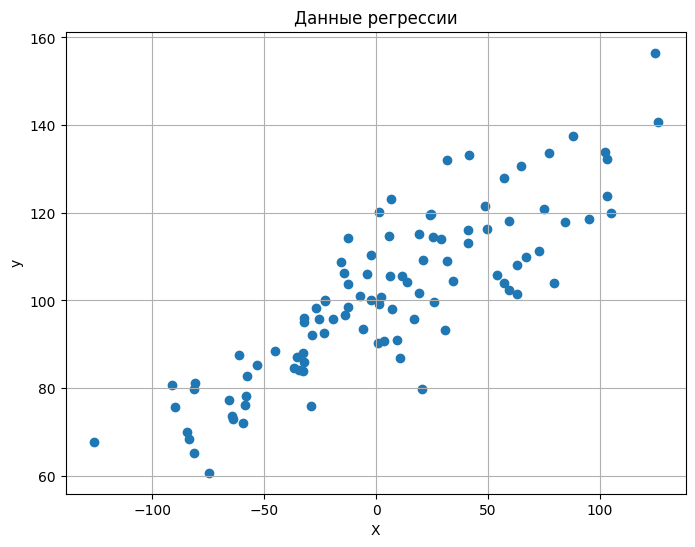

In [124]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.title('Данные регрессии')
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.show()

Заметим, что целевая переменная $y$ явна некоторым образом зависит от $X$: чем больше значнеие $X$, тем больше значение $y$. При этом сама зависимость похожа на поведение линейной функции.

Таким образом, мы предполагаем, что между данными существует некоторая линейная взаимосвязь. 

### Доказательство линейной взаимосвязи

В теории вероятностей характеристикой линейной взаимосвязи между двумя случайными величинами является коэффициент корреляции Пирсона. 

Тогда мы выдвигаем две гипотезы:

- $H_0 :$ истинная корреляция между $X$ и $y$ равна нулю (то есть выборки $X$ и $y$ независимы),
- $H_1 :$ дистинная корреляция между $X$ и $y$ не равна нулю (то есть выборки $X$ и $y$ зависимы).

Условия примененеия **теста Пирсона**:

- Обе выборки одной размерности;
- Обе выборки имеют близкое к `нормальному распределению`.

Следовательно, нам нужно выдвинуть также гипотезы
- $H_0' :$ выборка $X$ имеет нормальное распределение
- $H_0'':$ выборка $y$ имеет нормальное распределение

Для этого сперва рассмотрим гистограммы распределений обеих выборок

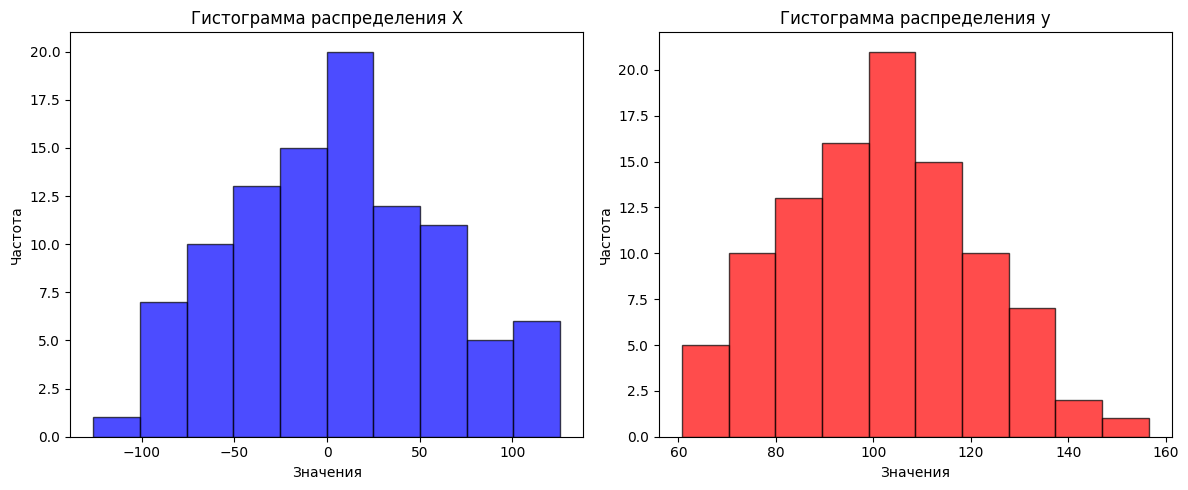

In [125]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(X, bins=10, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_title('Гистограмма распределения X')
axes[0].set_xlabel('Значения')
axes[0].set_ylabel('Частота')

axes[1].hist(y, bins=10, color='red', alpha=0.7, edgecolor='black')
axes[1].set_title('Гистограмма распределения y')
axes[1].set_xlabel('Значения')
axes[1].set_ylabel('Частота')

plt.tight_layout()
plt.show()

Гистаграммы выборок схожи с гистограммами нормального распределения. 

Нам уже известно, что по ММП оценки для нормально распределения $\mathcal N(\mu,\sigma^2)$ строятся в виде
$$
\mu = \overline x= \dfrac 1 n \sum x_i,
$$
$$
\sigma^2 = S^2 = \dfrac 1 n \sum(x_i - \overline x)^2
$$

С помощью критериев Колмогорова найдем $p$-значения, для тестирования гипотез

In [126]:
from scipy.stats import kstest, norm
import numpy as np

mean = np.mean(X)
std = np.std(X)
theoretical_distribution = norm(loc=mean, scale=std)

statistic, p_value = kstest(X, theoretical_distribution.cdf)

print(f"Значения параметров нормального распределения: {mean}, {std}")
print(f"Статистика критерия Колмогорова-Смирнова: {statistic}")
print(f"P-значение: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Гипотеза о нормальном распределении X отклоняется.")
else:
    print("Гипотеза о нормальном распределении X принимается.")

Значения параметров нормального распределения: 4.805520583168856, 54.22797468973959
Статистика критерия Колмогорова-Смирнова: 0.046187029065037494
P-значение: 0.9766989204208729
Гипотеза о нормальном распределении X принимается.


In [127]:
mean = np.mean(y)
std = np.std(y)
theoretical_distribution = norm(loc=mean, scale=std)

statistic, p_value = kstest(y, theoretical_distribution.cdf)

print(f"Значения параметров нормального распределения: {mean}, {std}")
print(f"Статистика критерия Колмогорова-Смирнова: {statistic}")
print(f"P-значение: {p_value}")

if p_value < alpha:
    print("Гипотеза о нормальном распределении y отклоняется.")
else:
    print("Гипотеза о нормальном распределении y принимается.")

Значения параметров нормального распределения: 101.35860829618416, 18.83289407602118
Статистика критерия Колмогорова-Смирнова: 0.0365845177532832
P-значение: 0.9986709709682129
Гипотеза о нормальном распределении y принимается.


Таким образом, обе выборки имеют нормальное распределение. Следовательно, мы можем применить тест корреляции Пирсона

In [128]:
from scipy.stats import pearsonr

statistic, p_value = pearsonr(X,y)

print(f"P-значение: {p_value}")

if p_value < alpha:
    print("Гипотеза об отсутствии корреляции отклоняется.")
else:
    print("Гипотеза об отстутствии корреляции принимается.")

P-значение: 5.8629592643070934e-30
Гипотеза об отсутствии корреляции отклоняется.


Таким образом, между $X$ и $y$ существует некоторая линейная взаимосвязь. Вычислив коэффициент корреляции по Пирсону
$$
r_{xy} = \dfrac{\sum(X_i - \overline X)\sum(y_i - \overline y)}{\sqrt{\sum(X_i - \overline X)^2(y_i - \overline y)^2}}
$$
мы получим числовое значение, характеризующее степень линейной взаимосвязи

In [129]:
data.corr()

,feature_1,target
feature_1,1.000000,0.856897
target,0.856897,1.000000


Коэффициент корреляции Пирсона -- это число $\in [-1, 1]$. Полученное нами значение 0.86 близко к 1, что означает сильно положительную корреляцию. 

В итоге между обеими выборками существует реальная линейная взаимосвязь, поэтому для моделирования истинной зависимости можно использовать модель линейной регрессии.

## Построение модели линейной регрессии по МНК

Сперва преобразуем выборку $X$ так, чтобы она стала столбцом

Разделим выборку на обучающую и тестовую по методу отложенной выборки. На тест выделим $25\%$.

In [130]:
X = X.reshape(-1, 1)
X[:5]

array([[ -4.01815699],
       [ 64.70602777],
       [-12.78547791],
       [102.99220697],
       [ 77.35437767]])

In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Модель линейной регрессии задается формулой
$$f(x,w) =w_0+ \sum_{j=1}^{m} w_j x_j,\ x_j \in \mathbb R^n.$$
Если ввести фиктивную переменную $x_0 = (1,\ldots, 1)^T\in \mathbb R^n$, то модель линейной регрессии можно обозначить
	$$f(x,w) = (w, x) = Xw,\ x \in \mathbb R^n.$$
Оценка параметра $w$ по МНК строится в виде
$$\hat w = (X^T X)^{-1} X^T y.$$
Следовательно, эти формулы и должны запрограммировать.

Добавим единичный столбец и выведем первые 5 строк матрицы

In [132]:
def add_const(X):
    return np.hstack([np.ones((X.shape[0], 1)), X])

In [133]:
add_const(X)[:5]

array([[  1.        ,  -4.01815699],
       [  1.        ,  64.70602777],
       [  1.        , -12.78547791],
       [  1.        , 102.99220697],
       [  1.        ,  77.35437767]])

Найдем оценку параметра $\hat w$

In [134]:
def fit(X, y):
    X = add_const(X)
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

In [135]:
w = fit(X, y)
w

array([99.92852028,  0.29759274])

Определим функцию, вычисляющую значения $$y = Xw$$

In [136]:
def predict(X):
    X = add_const(X)
    return X @ w

Рассмотрим на графике полученный результат

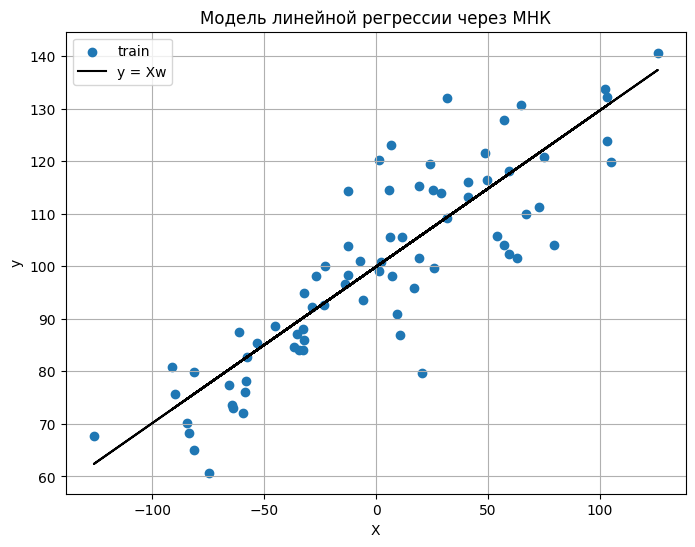

In [137]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, label='train')
plt.plot(X_train, predict(X_train), color='black', label='y = Xw')
plt.title('Модель линейной регрессии через МНК')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

Таким образом, мы построили модель линейной регрессии, которая описывает обучающую выборку наилучшим образом.

Теперь рассмотрим результат на тестовой выборке

In [138]:
y_pred = predict(X_test)
y_pred

array([ 95.2333361 , 100.91513024,  93.10535082,  75.76341056,
        94.17789149,  99.26776118,  91.22499623, 110.12882766,
       100.22829878,  98.73274595,  90.36934195, 136.97316744,
       125.01433052,  95.61084594, 118.61256848, 122.94862117,
       106.14935351, 107.19908806, 126.07930625, 128.19029119,
        99.21103823, 109.05488414, 104.01666112, 112.28179503,
        92.35818323])

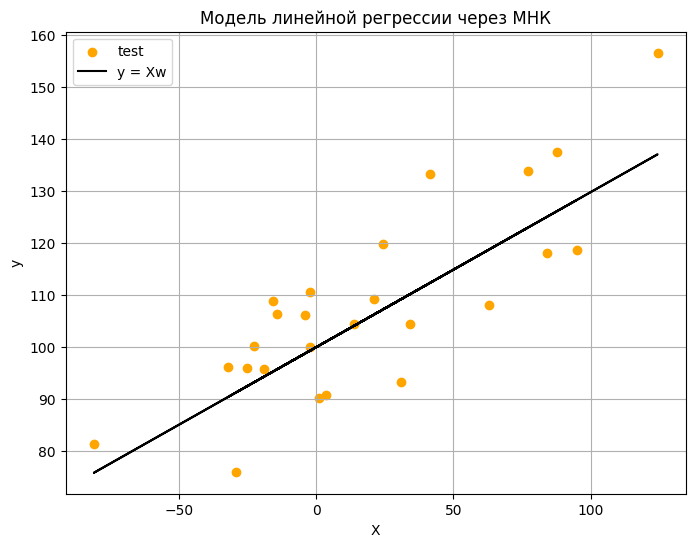

In [139]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='orange', label='test')
plt.plot(X_test, y_pred, color='black', label='y = Xw')
plt.title('Модель линейной регрессии через МНК')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

Завернем теперь всю модель в один класс

In [140]:
class OLS:
    def __init__(self):
        self.w = None

    def add_const(self, X):
        return np.hstack([np.ones((X.shape[0], 1)), X])

    def fit(self, X, y):
        X = self.add_const(X)
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y
        return self.w

    def predict(self, X):
        X = self.add_const(X)
        return X @ self.w

Метод построения оценки $\hat w$ заключается в минимизации показателя
$$MSE(X,y,w) = \dfrac{1}{n}\sum\limits_{i=1}^n(y_i - x_i^T w)^2 = \dfrac{1}{n}|| y - Xw||_2^2.$$

Определим эту функцию и найдем ее значение

In [141]:
def mse(X, y, w):
    X = add_const(X)
    return np.mean((y - X @ w)**2)

Значение ошибки на обучающей выборке

In [142]:
mse(X_train, y_train, w)

88.23762473811095

Значение ошибки на тестовой выборке

In [143]:
mse(X_test, y_test, w)

112.27773763707383

## Значимость и адекватность модели

Полученная модель задается уравнением вида
$$y = w_0 + w_1 x.$$
С точки зрения математики мы смогли найти значения коэффициентов $w_0, w_1$ и оценить ошибку. И в принципе этого было бы достаточно.

Однако с точки зрения статистики необходимо также оценить статистическую значимость полученных оценок (как мы делали это ранее для оценок, построенных с помощью МНК). Для этого выдвигаются две гипотезы

- $H_0:$ $w_0 = w_1 = 0$, то есть коэффициенты незначимы;
- $H_1:$ $w_0 \ne0$, $w_1 \ne 0$, то есть коэффициенты значимы.

Для проверки этих гипотез используеся $t$-критерий Стъюдента, в котором рассчитываются статистики для каждого из коэффициентов
$$
t_i = \dfrac{w_i}{s.e.(w_{i})},
$$
где $s.e.(w_{i})$ -- это стандартная ошибка $i$-ого коэффициента, которая рассчитывается как корень из $i$-ого диагонального элемента ковариационной матрицы по параметрам модели
$$
C = cov(w) = s^2 (X X^T)^{-1},\quad s^2=\dfrac{1}{n-m}\sum_{i=1}^n(y_i - \hat y_i)^2,
$$
где $m$ -- число параметров ($\dim X = n\times m$). Тогда 
$$
s.e.(w_{i}) = \sqrt{diag\{cov(w)\}_i}
$$
Далее расчитанные статистики сравниваются по таблице $t$-распределения.

Рассмотрим как выглядят значение $s^2$ и матрица $C$:

In [144]:
y_hat = predict(X_train)

residuals = y_train - y_hat
n, m = add_const(X_train).shape
s2 = (residuals.T @ residuals) / (n - m)
s2

90.6550939090181

In [145]:
XXT = add_const(X_train).T @ add_const(X_train)
XXT

array([[7.50000000e+01, 2.81410884e+01],
       [2.81410884e+01, 2.31522490e+05]])

In [146]:
C = s2 * np.linalg.inv(XXT)
C

array([[ 1.20878971e+00, -1.46925934e-04],
       [-1.46925934e-04,  3.91578496e-04]])

In [147]:
se = np.sqrt(np.diag(C))
se

array([1.09944973, 0.01978834])

Таким образом, $t$-статистики для коэффициентов

In [148]:
t = w / se
t

array([90.88957624, 15.03879049])

Далее значимость оценивается по таблице распределения. Мы рассмотрели подробно действия, как они происходят под капотом. Но на самом деле все эти действия уже реализованы в библиотеках Python. Поэтому мы можем воспользоваться нужными инструментами и получить следующую сводку по нашей линейной модели.

In [149]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = sm.OLS(y_train, add_const(X_train)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     217.1
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           1.44e-23
Time:                        13:25:39   Log-Likelihood:                -274.07
No. Observations:                  75   AIC:                             552.1
Df Residuals:                      73   BIC:                             556.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.1239      1.094     90.580      0.000      96.943     101.305
x1             0.2902      0.020     14.735      0.000       0.251       0.329
==============================================================================
Omnibus:                        0.867   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.648   Jarque-Bera (JB):                0.365
Skew:                           0.099   Prob(JB):                        0.833
Kurtosis:                       3.279   Cond. No.                         55.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Перед нами таблица нашей линейной модели с уже рассчитанными статистиками и коэффициентами. В первую очередь нас интересует вторая таблица, где указаны

- значение коэффициента
- стандартная ошибка коэффицента
- $t$-статистика коэффициента
- $p$-значение коэффициента
- границы доверительного интервала построенной оценки

Для проверки гипотезы $H_0$ нам достаточно лишь $p$-значения коэффициентов. Установим критический уровень $p=0.05$ и тогда видим, что гипотеза $H_0$ о равенстве нулю коэффициентов $w_i$ отклоняется. Следовательно, построенные нами коэффициенты $w_i$ являются статистически значимы.

Вернемся к первой таблице, где указаны некоторые статистики. Показателем тесноты связи результативного
и факторного признаков в уравнении регрессии, а также мерой адекватности построенной регрессионной модели, служит коэффициент детерминации:
$$R^2 = r_{xy}^2.$$
Он показывает долю дисперсии исходного ряда, которая описывается моделью регрессии. Чем ближе $R^2$-метрика к значению 1, тем качественнее построенная модель.

Как можно видеть, в нашем случае R-squared статистика равна 0.748, что является достаточно хорошим результатом, так как это значение достаточно близко к 1. Следовательно, мы можем считать построенную линейную модель адекватной в смысле $R^2$ метрики.

Все остальные метрики также являются немало важными для исследования значимости и адекватности модели, но на них мы уже останавливаться не будем. Подробне про них можно почитать здесь



Финальным контрольным пропускным пунктом для нашей модели будет анализ остатков $y - \hat y$. 

По теореме Гаусса-Маркова для остатков линейной регрессии

- ошибки не носят систематического характера, то есть $\mathbb E(\varepsilon_i | x_i)= 0\  \forall i$;
- дисперсия ошибок одинакова и равна $\mathbb D (\varepsilon_i) = \sigma^2\ \forall i$ (гомоскедастичность);
- ошибки некоррелированы, то есть $cov(\varepsilon_i, \varepsilon_j) = 0\ \forall i\ne j$.

Они должны иметь нормальное или близкое к нормальному распределение и не зависеть от прогнозируемых значений $\hat y$.

Выдвигаем гипотезу

- $H_0$: остатки имеют нормальное распределение;
- $H_1$: остатки имеют не нормальное распределение.

Рассмотрим гистограмму распределения остатков

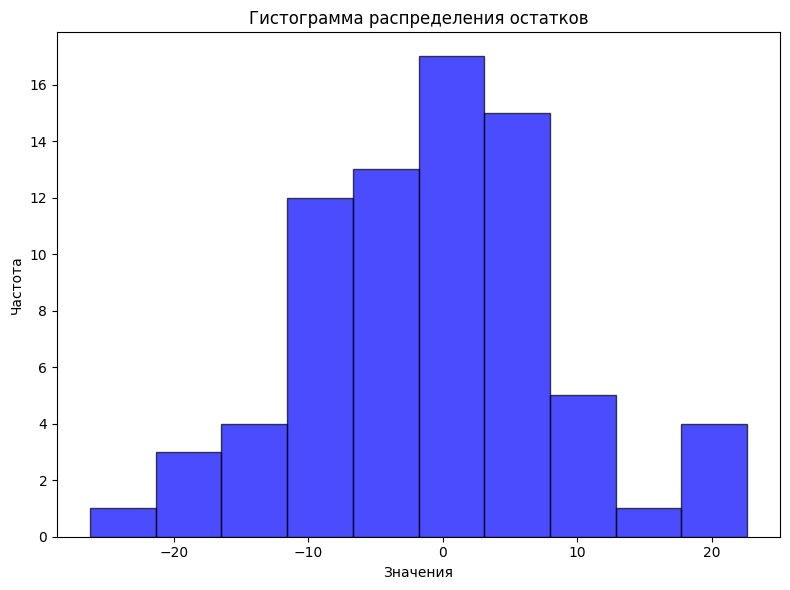

In [150]:
plt.figure(figsize=(8, 6))

plt.hist(residuals, color='blue', alpha=0.7, edgecolor='black')
plt.title('Гистограмма распределения остатков')
plt.xlabel('Значения')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Гистограмма распределения остатков схожа с нормальным распределением. Вычислим оценки правдоподобия для нормального распределения

In [151]:
residuals_mean = np.mean(residuals)
residuals_mean

-0.8073861491795526

Значение среднего близко к нулю, для нас это хорошо

In [152]:
residuals_std = np.std(residuals)
residuals_std

9.358726000061331

По критерию Колмогорова проверим гипотезу о нормальном распределении с соответствующими параметрами.

In [153]:
theoretical_distribution = norm(loc=residuals_mean, scale=residuals_std)

statistic, p_value = kstest(residuals, theoretical_distribution.cdf)

print(f"P-значение: {p_value}")

if p_value < alpha:
    print("Гипотеза о нормальном распределении residuals отклоняется.")
else:
    print("Гипотеза о нормальном распределении residuals принимается.")

P-значение: 0.9786265827982933
Гипотеза о нормальном распределении residuals принимается.


Таким образом, мы принимаем гипотезу $H_0$ о нормальном распределении остатков. 

По диаграмме рассеяния посмотрим, зависят ли остатки от предсказанных значений $\hat y$

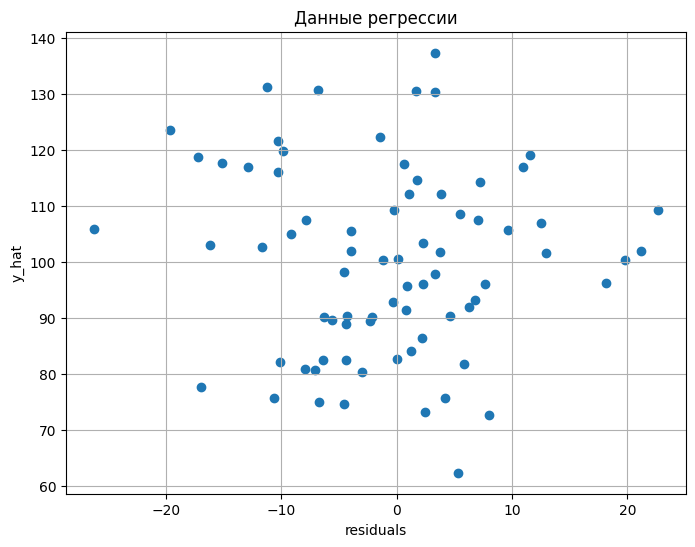

In [154]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(residuals, y_hat)
plt.title('Данные регрессии')
plt.xlabel("residuals")
plt.ylabel("y_hat")
plt.grid()
plt.show()

Легко увидеть, что никакой зависимости между этими выборками нет. 

Таким образом, построенную линейную модель мы можем считать статистически адекватной для прогнозирования значений выборки $X$.

## Градиентный спуск

Теперь построим модель линейной регрессии с помощью градиентного спуска.

Опишем алгоритм градиентного спуска, который мы будем использовать. Нам нужно найти решение уравнения $y = Xw$. Для этого зададим начальное приближение $w = (0,0)$. 
Градиент для MSE в качестве функции потерь мы уже считали
$$\dfrac{\partial MSE(X, y, w)}{\partial w} = \dfrac2n X^T(Xw - y).$$
Тогда в случае MSE итерационный процесс градиентного спуска для корректировки весов линейной регрессии задается формулой 
$$w^{(k+1)} = w^{(k)} - \alpha \cdot\dfrac2n X^T(Xw^{(k)} - y),$$
где параметр $\alpha >0$ называют темпом обучения (learning rate).

Пусть $k=\overline{1,1000}$.

In [165]:
def gradient_descent(X, y, lr=0.01, iterations=1000):
    X = add_const(X)
    n, m = X.shape
    w = np.zeros(m)
    for k in range(iterations):
        empirical_risk = np.mean((y - X @ w)**2)
        grad = 2 / n * X.T @ (X @ w - y)
        w -= lr * grad

        if k % 25 == 0:
            print(
                f"Step={k}, loss={empirical_risk},\ngradient values={grad}\n"
            )
    return w

In [166]:
w = gradient_descent(X_train, y_train, iterations=200)
w

Step=0, loss=10194.550679182512,
gradient values=[ -198.46559048 -1866.14732047]

Step=25, loss=4.205441549618148e+91,
gradient values=[8.76173605e+43 7.20612443e+47]

Step=50, loss=6.270642559053855e+180,
gradient values=[-3.38329906e+88 -2.78260768e+92]

Step=75, loss=9.350018931302901e+269,
gradient values=[1.30644343e+133 1.07448956e+137]

Step=100, loss=inf,
gradient values=[-5.04476375e+177 -4.14908588e+181]

Step=125, loss=inf,
gradient values=[1.94800943e+222 1.60214805e+226]

Step=150, loss=inf,
gradient values=[-7.52213766e+266 -6.18661184e+270]

Step=175, loss=nan,
gradient values=[nan nan]



/tmp/ipykernel_35529/2541733623.py:6: RuntimeWarning: overflow encountered in square
  empirical_risk = np.mean((y - X @ w)**2)
/tmp/ipykernel_35529/2541733623.py:6: RuntimeWarning: overflow encountered in matmul
  empirical_risk = np.mean((y - X @ w)**2)
/tmp/ipykernel_35529/2541733623.py:7: RuntimeWarning: overflow encountered in matmul
  grad = 2 / n * X.T @ (X @ w - y)
/tmp/ipykernel_35529/2541733623.py:7: RuntimeWarning: invalid value encountered in matmul
  grad = 2 / n * X.T @ (X @ w - y)


array([nan, nan])

Мы столкнулись с ошибкой. Вспомним, что методы градиентного спуска будут корректно работать только со стандартизированными данными
$$
X_{norm} = \dfrac{X - \mu}{\sigma}.
$$
Преобразуем наши данные к стандартному виду

In [167]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
y_train_norm = (y_train - np.mean(y_train)) / np.std(y_train)

In [168]:
w_gd = gradient_descent(X_train_norm, y_train_norm)
w_gd

Step=0, loss=1.0000000000000002,
gradient values=[-1.53349555e-15 -1.73016541e+00]

Step=25, loss=0.5241648794598864,
gradient values=[-9.40220124e-16 -1.04409380e+00]

Step=50, loss=0.3508801558385786,
gradient values=[-6.00214323e-16 -6.30073784e-01]

Step=75, loss=0.2877751134734225,
gradient values=[-3.26128013e-16 -3.80227306e-01]

Step=100, loss=0.2647941703834197,
gradient values=[-1.76941795e-16 -2.29453768e-01]

Step=125, loss=0.256425207690233,
gradient values=[-1.56125113e-16 -1.38467256e-01]

Step=150, loss=0.2533774852235942,
gradient values=[-5.72458747e-17 -8.35601055e-02]

Step=175, loss=0.252267597107924,
gradient values=[-6.24500451e-17 -5.04255765e-02]

Step=200, loss=0.251863409507908,
gradient values=[ 1.73472348e-18 -3.04300569e-02]

Step=225, loss=0.2517162166389149,
gradient values=[-3.46944695e-18 -1.83634660e-02]

Step=250, loss=0.2516626134589027,
gradient values=[-3.29597460e-17 -1.10817041e-02]

Step=275, loss=0.25164309280598585,
gradient values=[-2.602085

array([7.77451020e-16, 8.65082704e-01])

Чтобы сравнить результаты, полученные с помощью модели градиентного спуска, рассчитаем коэффициенты $w_i$ с помощью МНК для нормализованных данных

In [89]:
ols = OLS()
w_ols = ols.fit(X_train_norm, y_train_norm)
w_ols

array([7.80625564e-16, 8.65082706e-01])

Легко видеть, что значения коэффициентов приблизительно совпадают

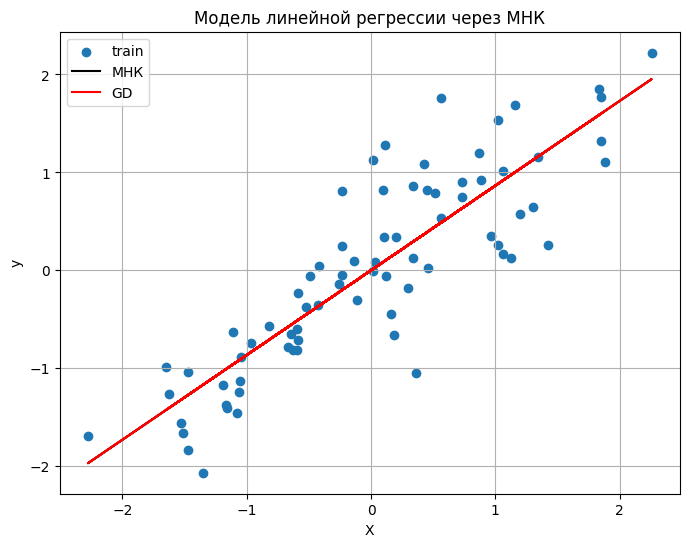

In [90]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_norm, y_train_norm, label='train')
plt.plot(X_train_norm, add_const(X_train_norm) @ w_ols, color='black', label='МНК')
plt.plot(X_train_norm, add_const(X_train_norm) @ w_gd, color='red', label='GD')
plt.title('Модель линейной регрессии через МНК')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

То есть прямые совпадают. Также рассмотрим MSE метрику. В силу того, что мы изменили масштаб данных, значения MSE метрики также изменятся (хотя само качество линейной модели через МНК не улучшилось).

In [91]:
mse(X_train_norm, y_train_norm, w_ols)

0.25163191241759436

In [92]:
mse(X_train_norm, y_train_norm, w_gd)

0.2516319124175944

Значения MSE в случае МНК и GD также приблизительно совпадают. 

## Регуляризация

Для рассмотрения проблемы мультиколлинеарности и введения регуляризации решим задачу регресии для другого набора данных

In [377]:
data = pd.read_csv('lin-reg-data-2.csv')
display(data)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,target
0,-6.943823,51.993291,26.222862,34.064965,-7.501517,57.952525,9.905189,96.216482
1,9.208458,-5.283805,48.576470,34.656914,8.239763,107.353999,314.586239,178.721231
2,28.446121,39.047724,-0.276416,-60.055820,27.205436,-0.610880,6.476917,-5.684095
3,-5.528085,-5.791998,16.910914,14.906694,-6.346397,37.373120,22.676895,8.530370
4,35.618799,11.346498,53.456076,36.430884,39.323923,118.137928,156.964828,229.664028
...,...,...,...,...,...,...,...,...
995,31.737431,-51.825370,47.835356,45.694319,31.926773,105.716137,220.485914,219.768183
996,26.275942,38.094873,-34.118235,13.887947,26.157545,-75.401299,-190.994816,-18.920631
997,-0.244200,7.432874,-9.726008,11.756662,-1.317156,-21.494478,-51.058019,-33.334934
998,-15.119965,-21.851229,23.265027,-3.728416,-15.916430,51.415709,166.789160,-11.949234


В данном случае у нас уже 6 признаков, то есть вся задача переходит из $\mathbb R^2$ в $\mathbb R^7$. В таком случае визуализация всего пространства усложняется. 

Однако мы можем рассмотреть, как каждый конкретный признак взаимосвязан с другими и с таргетом, а заодно и исследовать сразу же их распределения с помощью матрицы рассеяния, которую мы возьмем из библиотеки seaborn

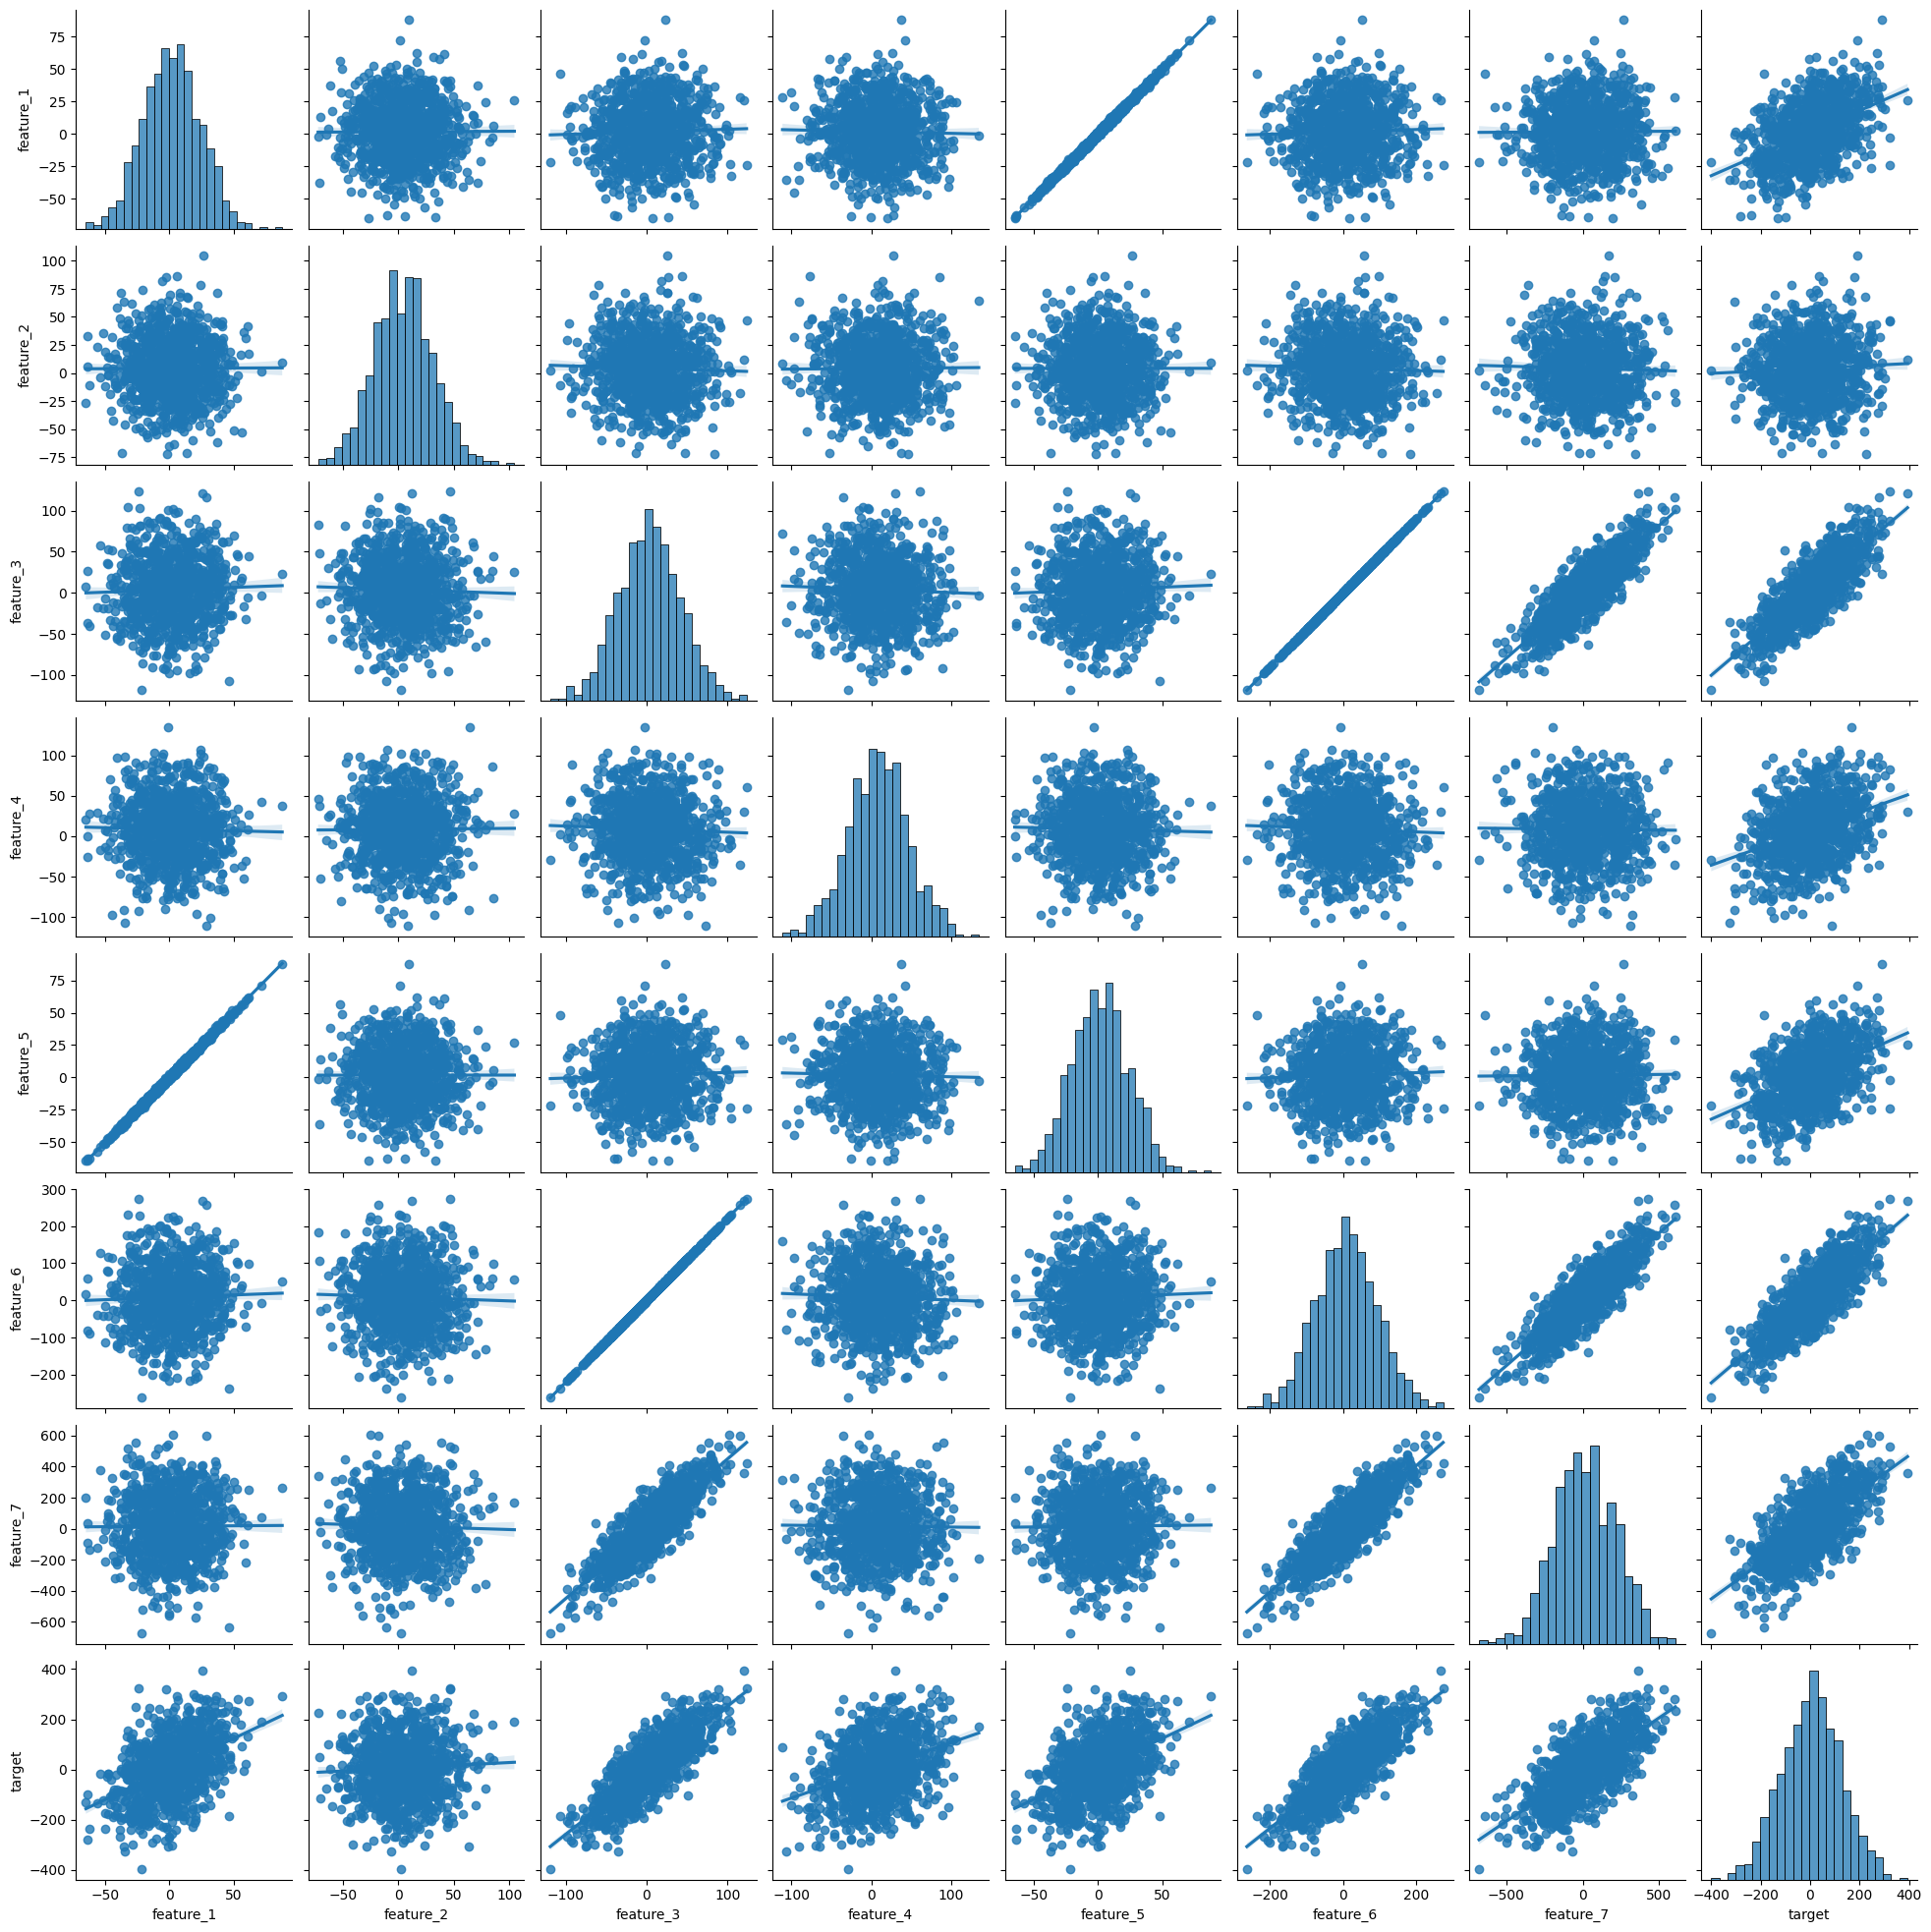

In [48]:
import seaborn as sns

sns.pairplot(data=data, kind='reg', diag_kind='auto')
plt.show()

В строке (или столбце), соответствующей target, легко увидеть, что все признаки кроме feature_2 имеют некоторую положительную корреляцию с target. То есть на этих данных действительно применительна модель линейной регресии.

По гистограммам заметно, что все переменные имеют распределение схожее с нормальным. Поэтому для каждой случайной величины проверим гипотезу о нормальном распределении

In [49]:
for column in data.columns:

    random_variable = data[column]
    
    mean = np.mean(random_variable)
    std = np.std(random_variable)
    theoretical_distribution = norm(loc=mean, scale=std)
    
    statistic, p_value = kstest(random_variable, theoretical_distribution.cdf)
    
    print(f"Значения параметров нормального распределения случайной величины {column}: {mean}, {std}")
    print(f"P-значение: {p_value}")
    
    alpha = 0.05
    if p_value < alpha:
        print(f"Гипотеза о нормальном распределении {column} отклоняется.")
    else:
        print(f"Гипотеза о нормальном распределении {column} принимается.")

    print('\n')

Значения параметров нормального распределения случайной величины feature_1: 1.6843151100438454, 22.301916776784605
P-значение: 0.9847157085460532
Гипотеза о нормальном распределении feature_1 принимается.


Значения параметров нормального распределения случайной величины feature_2: 4.136998368386674, 26.566427404815
P-значение: 0.9025875961668375
Гипотеза о нормальном распределении feature_2 принимается.


Значения параметров нормального распределения случайной величины feature_3: 3.7559324972352175, 38.15054910056256
P-значение: 0.9949706672409037
Гипотеза о нормальном распределении feature_3 принимается.


Значения параметров нормального распределения случайной величины feature_4: 8.471165838542102, 37.86157284675983
P-значение: 0.9810424449642204
Гипотеза о нормальном распределении feature_4 принимается.


Значения параметров нормального распределения случайной величины feature_5: 1.688091875495092, 22.357587816476226
P-значение: 0.9801759297290148
Гипотеза о нормальном распределени

Таким образом, для всех столбцов гипотеза о нормальности распределения принимается. Далее рассмотрим гипотезы об истинной корреляции между target и feature_i

In [50]:
data.iloc[:, :-1]

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7
0,-6.943823,51.993291,26.222862,34.064965,-7.501517,57.952525,9.905189
1,9.208458,-5.283805,48.576470,34.656914,8.239763,107.353999,314.586239
2,28.446121,39.047724,-0.276416,-60.055820,27.205436,-0.610880,6.476917
3,-5.528085,-5.791998,16.910914,14.906694,-6.346397,37.373120,22.676895
4,35.618799,11.346498,53.456076,36.430884,39.323923,118.137928,156.964828
...,...,...,...,...,...,...,...
995,31.737431,-51.825370,47.835356,45.694319,31.926773,105.716137,220.485914
996,26.275942,38.094873,-34.118235,13.887947,26.157545,-75.401299,-190.994816
997,-0.244200,7.432874,-9.726008,11.756662,-1.317156,-21.494478,-51.058019
998,-15.119965,-21.851229,23.265027,-3.728416,-15.916430,51.415709,166.789160


In [51]:
target = data['target']

for feature in data.iloc[:, :-1].columns:

    statistic, p_value = pearsonr(data[feature], target)
    
    print(f"P-значение: {p_value}")
    
    if p_value < alpha:
        print(f"Гипотеза об отсутствии корреляции между {feature} и target отклоняется.")
    else:
        print(f"Гипотеза об отсутствии корреляции между {feature} и target принимается.")

    print('\n')

P-значение: 3.846010047698174e-51
Гипотеза об отсутствии корреляции между feature_1 и target отклоняется.


P-значение: 0.11553483171360478
Гипотеза об отсутствии корреляции между feature_2 и target принимается.


P-значение: 1.0162415100319011e-234
Гипотеза об отсутствии корреляции между feature_3 и target отклоняется.


P-значение: 7.742218922383495e-30
Гипотеза об отсутствии корреляции между feature_4 и target отклоняется.


P-значение: 1.4267097534498253e-51
Гипотеза об отсутствии корреляции между feature_5 и target отклоняется.


P-значение: 1.0162415100319011e-234
Гипотеза об отсутствии корреляции между feature_6 и target отклоняется.


P-значение: 6.449948148167825e-143
Гипотеза об отсутствии корреляции между feature_7 и target отклоняется.




Таким образом, мы можем считать, что между feature_2 и target нет корреляционной взаимосвязи, следовательно, для модели линейной регресии этот признак будет неинформативным. А тогда мы можем его исключить.

In [378]:
data = data.drop(columns='feature_2')
data.head()

,feature_1,feature_3,feature_4,feature_5,feature_6,feature_7,target
0,-6.943823,26.222862,34.064965,-7.501517,57.952525,9.905189,96.216482
1,9.208458,48.576470,34.656914,8.239763,107.353999,314.586239,178.721231
2,28.446121,-0.276416,-60.055820,27.205436,-0.610880,6.476917,-5.684095
3,-5.528085,16.910914,14.906694,-6.346397,37.373120,22.676895,8.530370
4,35.618799,53.456076,36.430884,39.323923,118.137928,156.964828,229.664028


Теперь рассмотрим матрицу корреляции для оставшихся данных

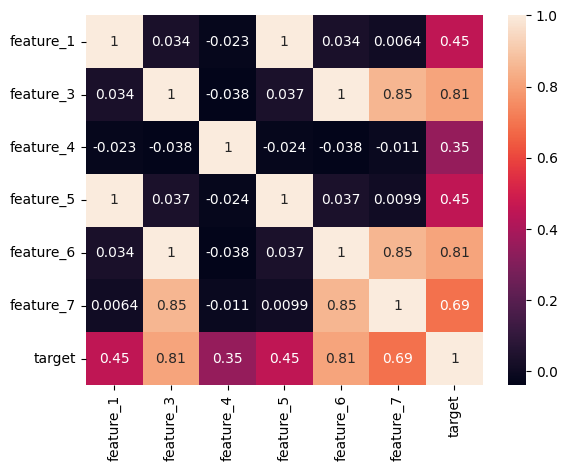

In [194]:
sns.heatmap(data.corr(), annot=True)
plt.show()

Заметно, что у нас есть некоторые признаки, которые коррелируют между собой:

- feature_1 и feature_5
- feature_3 и feature_6
- feature_3 и feature_7
- feature_6 и feature_7

Теперь обозначим матрицу признаков через $X$, а вектор таргетов черезе $y$

In [379]:
X = data.iloc[:, :-1].values
y = data['target'].values

Сразу же проведем нормализацию признаков, чтобы модели градиентного спуска корректно отрабатывали

In [196]:
X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)    

Далее разбиваем весь набор данных на обучающую и тестовую выборки

In [380]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Вычислим определитель матрицы $X^T X$

In [198]:
np.linalg.det(ols.add_const(X_train).T @ ols.add_const(X_train))

0.0057228241025382405

Определитель не нулевой, хотя в некоторой степени близок к нулю

Попробуем применить МНК

In [199]:
w = ols.fit(X_train, y_train)
w

array([ 6.12923886e-02,  2.48656604e+00,  8.40162752e-02,  9.49350610e-01,
       -6.43901679e-01,  9.11995762e-01, -1.52757547e-03])

In [200]:
mse(X_train, y_train, w)

0.013918374719634481

In [201]:
mse(X_test, y_test, w)

0.016100005284801416

Значения ошибок на обучающей и тестовой выборках также приемлемы. Рассмотрим поведение остатков модели

In [202]:
y_hat = ols.predict(X_train)

residuals = y_train - y_hat

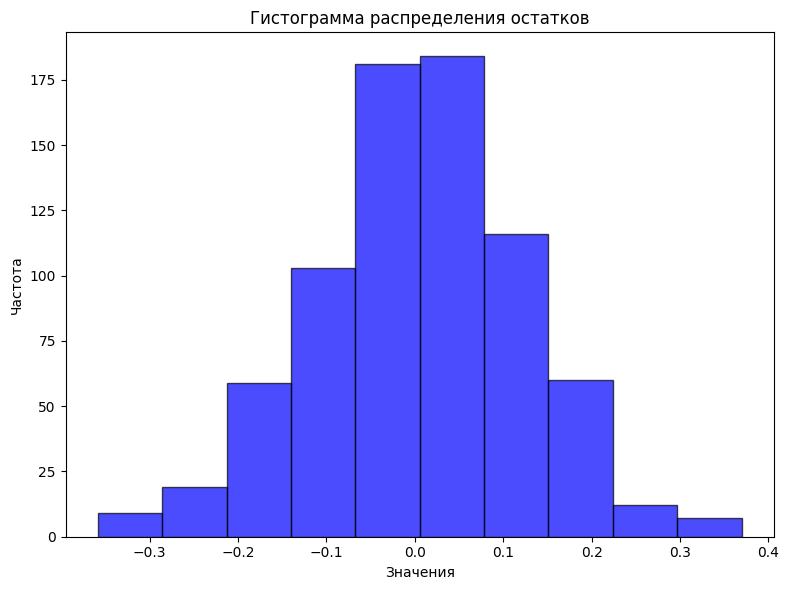

In [203]:
plt.figure(figsize=(8, 6))

plt.hist(residuals, color='blue', alpha=0.7, edgecolor='black')
plt.title('Гистограмма распределения остатков')
plt.xlabel('Значения')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Распределение сильно схоже с нормальным. Рассмотрим зависимость остатков и спрогнозированных значений

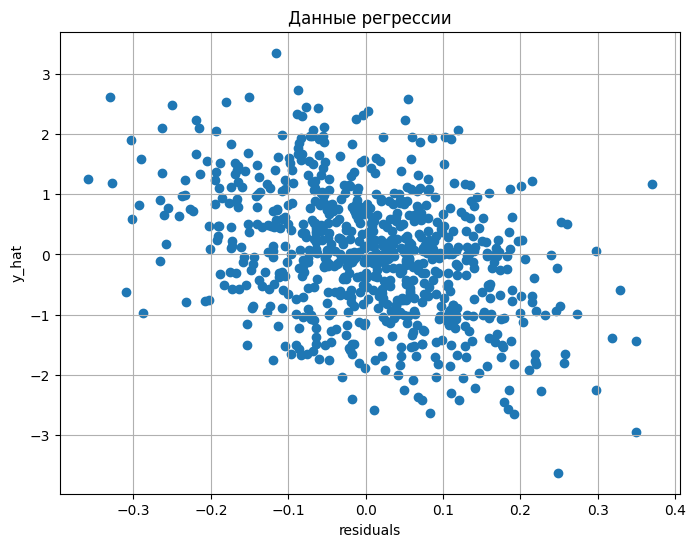

In [204]:
plt.figure(figsize=(8,6))
plt.scatter(residuals, y_hat)
plt.title('Данные регрессии')
plt.xlabel("residuals")
plt.ylabel("y_hat")
plt.grid()
plt.show()

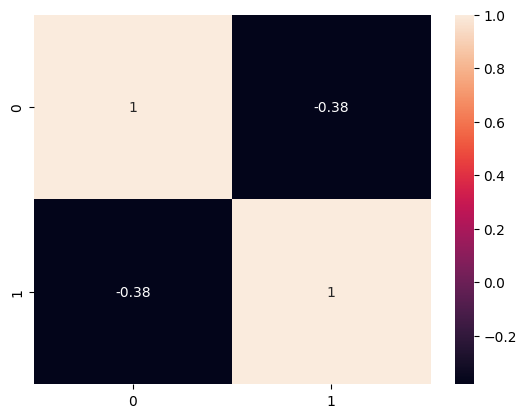

In [205]:
sns.heatmap(np.corrcoef(residuals, y_hat), annot=True)
plt.show()

Заметно, что прослеживается некоторая завимость между спрогнозированным значением и остатками. Это свидетельствует о переобучении: ошибки модели $\varepsilon$, которые должны быть случайными, на самом деле не случайны.

Следовательно, нам нужно добавить регуляризацию к МНК. Введем Ridge регуляризацию
$$
	\hat w_\lambda = (X^{T}X + \lambda E_m)^{-1} X^{T} y,
	$$
и запрограммируем это в виде одельного класса.

In [206]:
class Ridge:
    def __init__(self):
        self.w = None

    def add_const(self, X):
        return np.hstack([np.ones((X.shape[0], 1)), X])

    def fit(self, X, y, param_lambda=0.1):
        X = self.add_const(X)
        n, m = X.shape
        self.w = np.linalg.inv(X.T @ X + param_lambda * np.eye(m)) @ X.T @ y
        return self.w

    def predict(self, X):
        X = self.add_const(X)
        return X @ self.w

Найдем значения параметров в случае Ridge регрессии с $\lambda = 0.1$.

In [207]:
ridge = Ridge()
w = ridge.fit(X_train, y_train, param_lambda=0.1)
w

array([ 0.07460258,  1.35322115,  0.33460672,  0.94965418,  0.43568083,
        0.74592438, -0.00157757])

Заметно, что относительно обычного МНК, МНК с Ridge имеет другие коэффициенты. Вычислим значения ошибки MSE

In [208]:
mse(X_train, y_train, w)

0.011566102772105244

In [209]:
mse(X_test, y_test, w)

0.013085867844077748

В данном случае ошибка стала ниже.

Рассмотрим поведение остатков

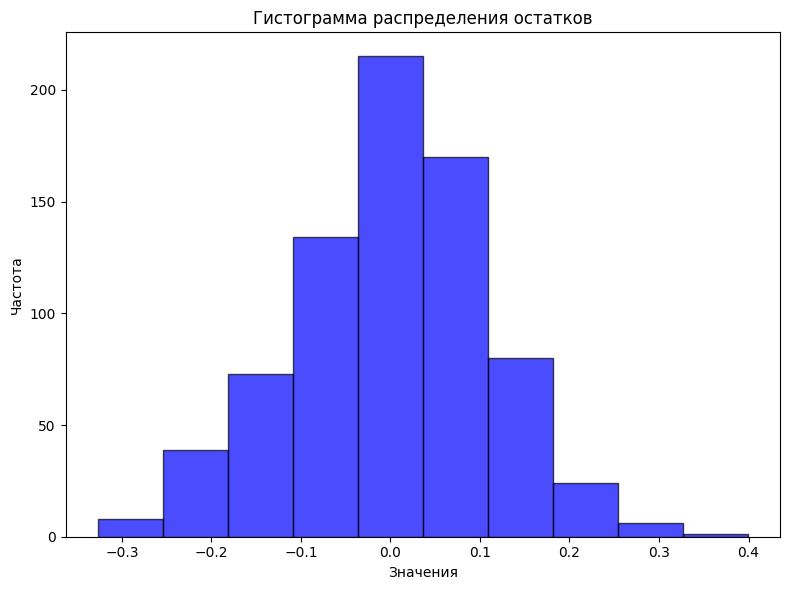

In [210]:
y_hat = ridge.predict(X_train)

residuals = y_train - y_hat

plt.figure(figsize=(8, 6))

plt.hist(residuals, color='blue', alpha=0.7, edgecolor='black')
plt.title('Гистограмма распределения остатков')
plt.xlabel('Значения')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Остатки также распределены нормально

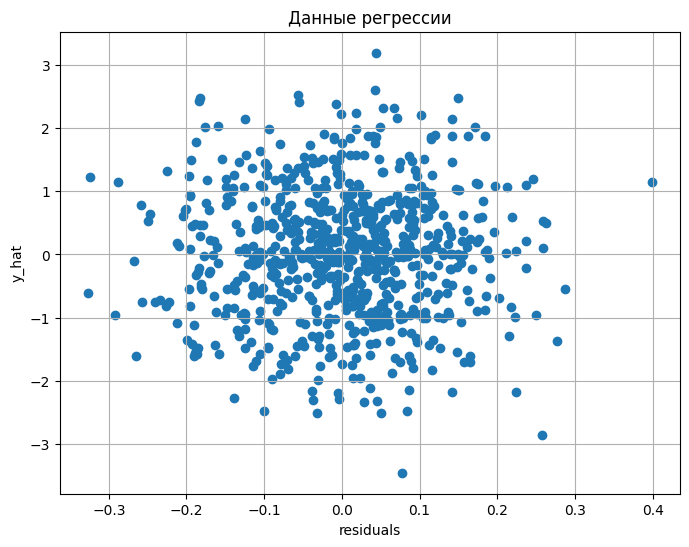

In [211]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(residuals, y_hat)
plt.title('Данные регрессии')
plt.xlabel("residuals")
plt.ylabel("y_hat")
plt.grid()
plt.show()

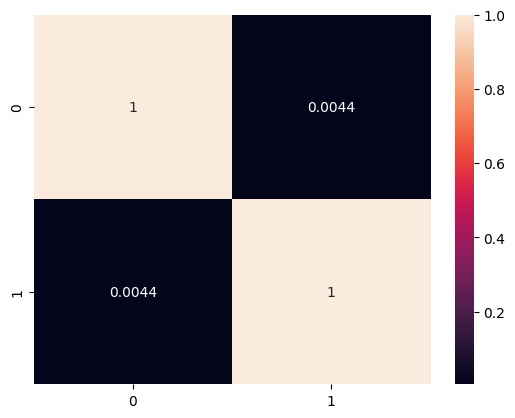

In [784]:
sns.heatmap(np.corrcoef(residuals, y_hat), annot=True)
plt.show()

Но в данном случае остатки никак не связаны с прогнозами, что свидетельствует о том, что переобучение стало не настолько значительным

## Другие лоссы и регуляризации

МНК работает лишь в случае MSE функции потерь и Ridge регуляризации. Но если мы хотим минимизировать другую функцию потерь или использовать другую регуляризацию?
В этом случае нас спасает градиентный спуск. Но чтобы им воспользоваться для других лоссов и регуляризаций, необходимо рассчитать соответствующие градиенты:

- $MSE$ : $$\dfrac{\partial MSE(X, y, w)}{\partial w} = \dfrac2n X^T(Xw - y);$$
- $MAE$ : $$\dfrac{\partial MAE(X, y, w)}{\partial w} = \dfrac1n X^T \operatorname{sign}(Xw - y);$$
- $Ridge$ : $$\dfrac{\partial Ridge(X, y, w)}{\partial w} = 2 w;$$
- $LASSO$ : $$\dfrac{\partial LASSO(X, y, w)}{\partial w} = \operatorname{sign} w.$$

То есть в случае абсолютных значений при взятии производной появляется $\operatorname{sign}$. При жалении для других видов функций потерь (MAPE, RMSE) и других видов регуляризации (Elastic Net) Вы можете самостоятельно рассчитать градиенты.

Таким образом, мы можем преобразовать наш ранее написанный алгоритм градиентного спуска.

In [356]:
def gradient_descent(X, y, lr=0.01, iterations=1000, loss="mse", reg=None, lambda_param=1):

    X = add_const(X)
    n, m = X.shape
    w = np.zeros(m)

    def loss_function(X, y, w):
        if loss == "mse":
            return np.mean((y - X @ w)**2)
        elif loss == "mae":
            return np.mean(np.absolute(y - X @ w))
        else:
            raise ValueError(
                "Unknown loss function. Available loss functions: `mse`, `mae`"
            )
            
    def loss_grad(X, y, w): 
        if loss == "mse":
            return 2 / n * X.T @ (X @ w - y)
        elif loss == "mae":
            return 1 / n * X.T @ np.sign(X @ w - y)
        else:
            raise ValueError(
                "Unknown loss function. Available loss functions: `mse`, `mae`"
            )
    
    def reg_function(w):
        if reg is None:
            return 0.0
        elif reg == "ridge":
            return np.sum(w**2)
        elif reg == "lasso":
            return np.sum(np.absolute(w))
        else:
            raise ValueError(
                "Unknown regularization mode. Available modes: `ridge`, `lasso`, None"
            )
        
    def reg_grad(w):
        if reg is None:
            return np.zeros(m)
        elif reg == "ridge":
            return 2 * w
        elif reg == "lasso":
            return np.sign(w)
        else:
            raise ValueError(
                "Unknown regularization mode. Available modes: `ridge`, `lasso`, None"
            )
    
    for k in range(iterations):
        empirical_risk = loss_function(X, y, w) + lambda_param * reg_function(w)
        grad = loss_grad(X, y, w) + lambda_param * reg_grad(w)
        w -= lr * grad

        if k % 25 == 0:
            print(
                f"Step={k}, loss={empirical_risk},\ngradient values={grad}\n"
            )
    return w

Возьмем набор из нестандартизированных признаков

In [398]:
data = pd.read_csv('lin-reg-data-2.csv')
data = data.drop(columns='feature_2')

X = data.iloc[:, :-1].values
y = data['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Попробуем на этом наборе прогнать градиентный спуск с MAE и MSE при регуляризации LASSO с $\lambda = 0.01$.

In [403]:
w = gradient_descent(X_train, y_train, loss='mae', lr=0.001, reg='lasso', lambda_param=0.01, iterations=300)
w

Step=0, loss=98.0979088542719,
gradient values=[-7.46666667e-02 -9.06552341e+00 -2.46220003e+01 -1.12228141e+01
 -9.15391524e+00 -5.44146207e+01 -1.09979509e+02]

Step=25, loss=47.26520429651751,
gradient values=[  0.08333333 -12.34110183  -6.14016081 -15.46614658 -12.35747765
 -13.5818554    5.58075494]

Step=50, loss=30.071085687729084,
gradient values=[  0.26733333 -11.72141104  -3.14093326 -13.09161844 -11.71727436
  -6.9535625    4.53214108]

Step=75, loss=20.70352213101612,
gradient values=[ 0.502      -8.49298125 -1.33337367 -6.49567572 -8.42461173 -2.95885582
  1.57949877]

Step=100, loss=18.474483192928943,
gradient values=[ 0.65933333 -3.85420186 -0.38103105 -1.29106683 -3.80741755 -0.85417863
 -1.38024912]

Step=125, loss=18.07653841332668,
gradient values=[ 0.718      -1.41167941 -0.18899865 -0.12646342 -1.36425964 -0.42978702
  0.31181142]

Step=150, loss=18.011855652628892,
gradient values=[ 0.73133333 -0.52092681  0.3119964   0.02742143 -0.48012538  0.67741203
  1.692605

array([-0.174446  ,  1.13443023,  0.42427187,  1.08974534,  1.1252403 ,
        0.94125873, -0.00438529])

In [402]:
w = gradient_descent(X_train, y_train, loss='mse', lr=0.001, reg='lasso', lambda_param=0.01, iterations=100)
w

Step=0, loss=15121.988532556747,
gradient values=[-1.39719753e+01 -2.62379344e+03 -7.77805877e+03 -3.34889444e+03
 -2.63851796e+03 -1.71895099e+04 -3.52611403e+04]

Step=25, loss=3.0136415094744625e+103,
gradient values=[1.17875959e+51 5.72516167e+51 3.84214709e+53 4.74894735e+51
 6.70745847e+51 8.49114508e+53 2.25882719e+54]

Step=50, loss=1.1353388075714262e+203,
gradient values=[-7.23506084e+100 -3.51402383e+101 -2.35825593e+103 -2.91483719e+101
 -4.11694381e+101 -5.21174560e+103 -1.38643640e+104]

Step=75, loss=4.277198213275529e+302,
gradient values=[4.44077873e+150 2.15685847e+151 1.44746437e+153 1.78908613e+151
 2.52692229e+151 3.19889625e+153 8.50975193e+153]



/tmp/ipykernel_35529/1848377565.py:9: RuntimeWarning: overflow encountered in square
  return np.mean((y - X @ w)**2)


array([-2.75137166e+195, -1.33632402e+196, -8.96804970e+197,
       -1.10846344e+196, -1.56560432e+196, -1.98193898e+198,
       -5.27238390e+198])

Как можно видеть, при функции потерь MAE алгоритм и на не масштабированных признаках способен производить минимизацию, в отличе от MSE, где функция потерь лишь растет.